# Data Exploration: UCI Adult Income Dataset

## Overview

The Adult Income dataset predicts whether income exceeds $50K/year based on census data. This is a binary classification problem with mixed data types, making it perfect for demonstrating feature engineering techniques.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())


Dataset shape: (32561, 15)

First few rows:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K 

In [2]:
# Dataset info
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())
print("\nCategorical columns:")
print(df.select_dtypes(include=['object']).columns.tolist())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Basic Statistics:
                age        fnlwgt  education-num  capit

Target distribution:
<=50K    24720
>50K      7841
Name: income, dtype: int64

Target distribution (%):
<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64


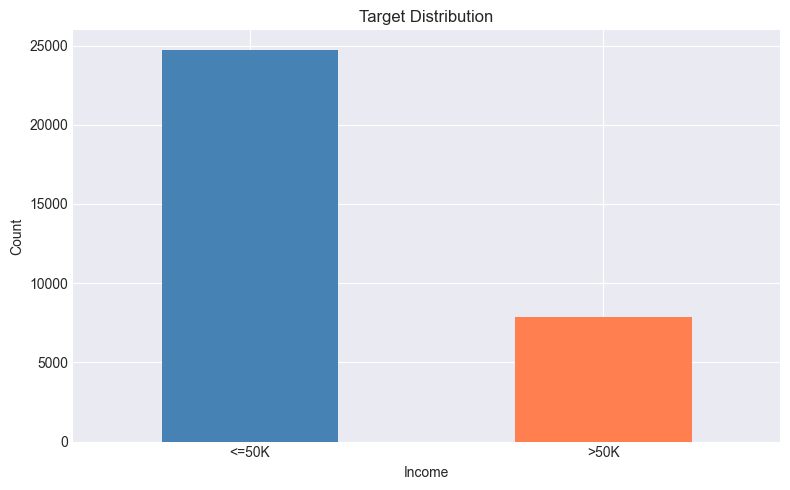

In [3]:
# Target distribution
print("Target distribution:")
print(df['income'].value_counts())
print(f"\nTarget distribution (%):")
print(df['income'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color=['steelblue', 'coral'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [4]:
# Prepare target variable
# Check unique income values first
print("Unique income values:", df['income'].unique())
print("Income value counts:\n", df['income'].value_counts())

# Create binary target: 1 if income > 50K, 0 otherwise
# Handle both '>50K' and ' >50K' formats (with or without leading space)
df['income_binary'] = df['income'].str.strip().str.contains('>50K', regex=False).astype(int)

# Verify target distribution
print("\nTarget variable distribution:")
print(df['income_binary'].value_counts())
print(f"\nTarget distribution (%):")
print(df['income_binary'].value_counts(normalize=True) * 100)

# Save preprocessed data
import pickle

# Handle missing values (simple strategy: drop for now, can be improved)
df_clean = df.dropna()

# Split data
X = df_clean.drop(['income', 'income_binary'], axis=1)
y = df_clean['income_binary']

# Verify y has both classes before splitting
print(f"\nBefore split - y unique values: {y.unique()}")
print(f"Before split - y value counts:\n{y.value_counts()}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify after split
print(f"\nAfter split - y_train unique values: {y_train.unique()}")
print(f"After split - y_train value counts:\n{y_train.value_counts()}")
print(f"\nAfter split - y_test unique values: {y_test.unique()}")
print(f"After split - y_test value counts:\n{y_test.value_counts()}")

data_dict = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

with open('../adult_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print("Data saved to '../adult_data.pkl'")


Unique income values: ['<=50K' '>50K']
Income value counts:
 <=50K    24720
>50K      7841
Name: income, dtype: int64

Target variable distribution:
0    24720
1     7841
Name: income_binary, dtype: int64

Target distribution (%):
0    75.919044
1    24.080956
Name: income_binary, dtype: float64

Before split - y unique values: [0 1]
Before split - y value counts:
0    24720
1     7841
Name: income_binary, dtype: int64

After split - y_train unique values: [1 0]
After split - y_train value counts:
0    19775
1     6273
Name: income_binary, dtype: int64

After split - y_test unique values: [0 1]
After split - y_test value counts:
0    4945
1    1568
Name: income_binary, dtype: int64

Training set: (26048, 14)
Test set: (6513, 14)
Data saved to '../adult_data.pkl'


In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing values per column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income_binary     0
dtype: int64

Total missing values: 0
